# Data Science Case: Starter Notebook

In [ ]:
TEAM_PASSWORD = 'UpI7omaywRqCblA' # fill in
PORT = 8082 # fill in

## Download data

In [ ]:
import urllib.request

rounds = ['0', '1', '2', '3']

ROUND_NAME_TO_ID = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3
}

def download_train(round_name):
    round_id = ROUND_NAME_TO_ID[round_name]
    url = f'http://3.95.7.226:{PORT}/results/{TEAM_PASSWORD}/round/{round_id}/train.csv'
        
    print(f'Downloading from {url}')
    urllib.request.urlretrieve(url, f'train_{round_name}.csv')

download_train('1')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read train data

,Stock1,Stock2,Stock3,Stock4,Stock1_Delay,Stock2_Delay,Stock3_Delay,Stock4_Delay
0,1147.07,1770.06,1612.78,1671.70,1146.71,1786.71,1615.70,1672.81
1,1148.06,1762.84,1609.76,1671.24,1147.07,1770.06,1612.78,1671.70
2,1148.38,1766.16,1607.54,1670.82,1148.06,1762.84,1609.76,1671.24
3,1148.75,1773.47,1599.46,1670.38,1148.38,1766.16,1607.54,1670.82
4,1148.50,1772.99,1598.25,1669.23,1148.75,1773.47,1599.46,1670.38
...,...,...,...,...,...,...,...,...
995,1257.02,1664.57,1546.97,1664.74,1258.33,1666.58,1548.73,1664.62
996,1255.80,1662.77,1547.24,1664.50,1257.02,1664.57,1546.97,1664.74
997,1253.14,1652.10,1547.39,1664.40,1255.80,1662.77,1547.24,1664.50
998,1251.94,1649.13,1547.61,1664.52,1253.14,1652.10,1547.39,1664.40


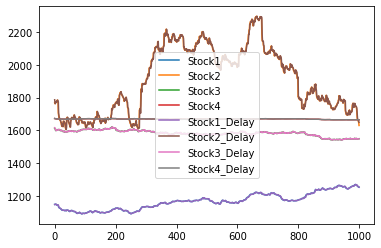

In [ ]:
df = pd.read_csv('train_1.csv', index_col=None)
df.plot()
df

## Basic Plotting

In [ ]:
df['Stock1Rets'] = df['Stock1'].pct_change()
df['Stock2Rets'] = df['Stock2'].pct_change()
df = df.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


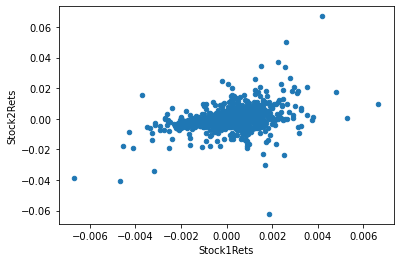

In [ ]:
df.plot.scatter('Stock1Rets', 'Stock2Rets')

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

beta: 2.2533287819625594
intercept: [-0.00025088]
In sample R2: 0.14718749781718288


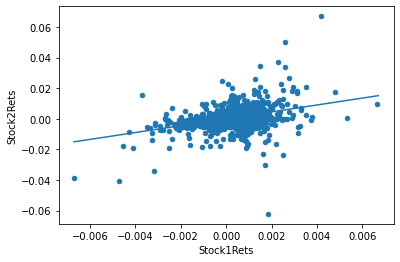

In [ ]:
model = LinearRegression()
X = df[['Stock1Rets']].to_numpy()
Y = df[['Stock2Rets']].to_numpy()
model.fit(X, Y)

beta = model.coef_[0,0]
intercept = model.intercept_

ax = df.plot.scatter('Stock1Rets', 'Stock2Rets')
x_bound = np.max(np.abs(X))
ax.plot([-x_bound, x_bound], [-x_bound * beta, x_bound * beta])



print(f'beta: {beta}')
print(f'intercept: {intercept}')

print(f'In sample R2: {model.score(X, Y)}')